### 1) Compare   the   two   locations   ( 4962_248    and    4962_956 ).   Which   do   you   think   is better?   Which   would   you   prefer   if   deciding   between   these   two   to   buy   a   new   car? Why?

#### Solution Steps:
     1.1) Basic Approach: Look at mean sentiment & ratings
     1.2) TimeLine: How these locations doing recently
     1.3) Sentiment Magnitude: how postive & how negative comments are
     1.4) Category wise Sentiment Mangintude: how locations doing under each category
     1.5) Conclusion
     
### 2) Create   a   formula   to   ranking   these   100   locations.   Explain   how   you   settled   on   this ranking/formula.   Please   also   share   the   formula   and   the   final   rankings.   (Hint:   do not   just   look   at   average   rating.)

#### Solution Steps:
     2.1) Identiy Feature 
     2.2) Determine Weigtage of each feature
     2.3) Final Formula & Rank Determination
    
### 3) Find   at   least   one   location   that   you   think   is   mis-ranked   by   your   algorithm   (i.e.   they should   probably   be   higher   or   lower).   Why   are   they   mis-ranked?   What   might   you do   to   address   that   issue.

#### Solution Steps:
     3.1) Look For Mis-Ranked Location
     3.2) Analyze Features of Mis-Ranked Location
     3.3) How to fix!!
    
---

##### Loading Libraries & Joining datasets

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphlab as gl
import datetime 
import warnings
import math
warnings.filterwarnings('ignore')
%matplotlib inline
category=pd.read_csv("categories[2][5].csv")
review=pd.read_csv("reviews[4][5].csv")
#convert string date to date datatype 
review['date']=review['date'].apply(lambda x: datetime.date(int(x[0:4]),int(x[5:7]),int(x[8:10])))
data=review.join(category.set_index('review_id'),on='review_id',how='inner')
data.head(3)

,location_id,review_id,date,rating,comment,category,sentiment
0,4962_661,GOOGLE_PLACES_0,2016-10-13,1.0,Very bad service. They don't follow a systemat...,maintenance_service,-1.0
1,4962_661,GOOGLE_PLACES_1,2017-04-02,5.0,Darren and Mo were awesome in putting me in my...,overall_experience,1.0
2,4962_661,GOOGLE_PLACES_2,2016-10-01,5.0,My salesman Digsby was great and very helpful ...,buying_a_car,1.0


#### Solution Steps:
#### 1) Compare the two locations ( 4962_248 and 4962_956 ). Which do you think is better? Which would you prefer if deciding between these two to buy a new car? Why?

#####     1.1) Naive Approach: Look at mean sentiment & ratings

In [21]:
print("-------------------------------Mean Ratings-------------------------------------")
print("Mean Rating for Location 4962_248",review['rating'][review['location_id']=='4962_248'].mean())
print("Mean Rating for Location 4962_956",review['rating'][review['location_id']=='4962_956'].mean())
print("-------------------------------Mean Sentiment-----------------------------------")
print("Mean Sentiment for Location 4962_248",data['sentiment'][data['location_id']=='4962_248'].mean())
print("Mean Sentiment for Location 4962_956",data['sentiment'][data['location_id']=='4962_956'].mean())

-------------------------------Mean Ratings-------------------------------------
('Mean Rating for Location 4962_248', 4.657534246575342)
('Mean Rating for Location 4962_956', 4.619047619047619)
-------------------------------Mean Sentiment-----------------------------------
('Mean Sentiment for Location 4962_248', 0.8392857142857143)
('Mean Sentiment for Location 4962_956', 0.9)


In above step we calculated mean rating & mean sentiment. we found that in terms of 'mean rating and mean sentiment polarity' there is very slight difference between these locations so these are NOT VERY ACURATE & HELPFUL MEASURES to identify better location!!. 

---
#####     1.2) TimeLine: How these locations doing recently(Last 3 Months!!)

In [22]:
loc_248=data[data['location_id']=='4962_248'].sort_values(by='date')
loc_956=data[data['location_id']=='4962_956'].sort_values(by='date')
recent_248=loc_248[loc_248['date']>=datetime.date(2017, 05, 01)]
recent_956=loc_956[loc_956['date']>=datetime.date(2017, 05, 01)]
print("Recent 3 months location 4962_248 :")
print(loc_248[loc_248['date']>=datetime.date(2017, 05, 01)].mean())
print("Recent 3 months location 4962_956 :")
print(loc_956[loc_956['date']>=datetime.date(2017, 05, 01)].mean())
print("------------------------------------------------------------------")

Recent 3 months location 4962_248 :
rating       4.840000
sentiment    0.893333
dtype: float64
Recent 3 months location 4962_956 :
rating       4.630372
sentiment    0.865330
dtype: float64
------------------------------------------------------------------


In above step we calculated mean rating & sentiment for most recent 3 months. we found that in terms of mean rating and mean sentimenet polarity there is very slight difference between these locations so recently also both off the locations are performaing ALMOST EQUALLY WELL!!.

----
#####     1.3) Sentiment Magnitude: how postive & how negative comments are 

     We know whether a comment is +ve or -ve but do we know how much positive or negative in this step we will 
     find  this sentiment magnitude

In [25]:
gl_data=gl.SFrame(data)
#handling sentiments with 0 polarity. by using rating as a support feature
data.loc[((data['rating'] <= 3) & (data['sentiment']==0)), 'sentiment'] = -1
data.loc[((data['rating'] > 3) & (data['sentiment']==0)), 'sentiment'] = 1
data['magnitude']=gl.sentiment_analysis.create(gl_data, features=['comment']).predict(gl_data)
data['magnitude']=data['magnitude']*data['sentiment']
data['magnitude']=data['magnitude'].apply(lambda x: -(1+x) if x<0 else x)
data.loc[(data['rating'].isnull()) & (data['magnitude']>=0.9),'rating']=5
data.loc[(data['rating'].isnull()) & (data['magnitude']>=0.8),'rating']=4
data.loc[(data['rating'].isnull()) & (data['magnitude']>=0.7),'rating']=3
data.loc[(data['rating'].isnull()) & (data['magnitude']>=0.4),'rating']=2
data.loc[(data['rating'].isnull()) & (data['magnitude']<=0.1),'rating']=1
data[['location_id','comment','magnitude']].head(3)

,location_id,comment,magnitude
0,4962_661,Very bad service. They don't follow a systemat...,-0.334222
1,4962_661,Darren and Mo were awesome in putting me in my...,0.972077
2,4962_661,My salesman Digsby was great and very helpful ...,0.908988


In [26]:
print("------------------------Magnitude------------------------")
print("Avg Magnitude of comments location 4962_248",data['magnitude'][data['location_id']=='4962_248'].mean())
print("Avg Magnitude of comments location 4962_956",data['magnitude'][data['location_id']=='4962_956'].mean())

------------------------Magnitude------------------------
('Avg Magnitude of comments location 4962_248', 0.8073153195596177)
('Avg Magnitude of comments location 4962_956', 0.8395602949511987)


#####    1.4) Category wise Sentiment Mangintude: how locations doing under each category

In [28]:
#Since we are interested in buying a car we can eliminate "leasing_a_car" option rest all are helpful in making a purchase decision
temp= data[data['category']!='leasing_a_car']
temp['category'].unique()

array(['maintenance_service', 'overall_experience', 'buying_a_car',
       'customer_service', 'pricing', 'competence',
       'likely_to_recommend_return', 'sales_tactics', 'speed',
       'administration', 'test_drive', 'getting_an_appointment',
       'financing_a_car', 'parts_purchase'], dtype=object)

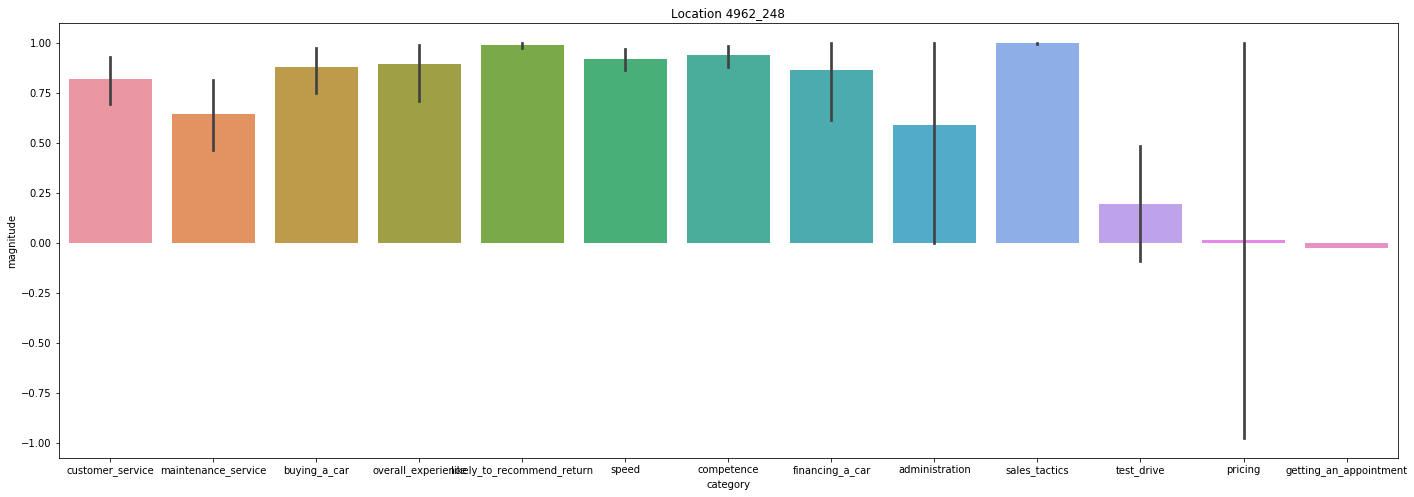

In [9]:
fig = plt.gcf()
fig.set_size_inches(24,8)
plt.title('Location 4962_248')
sns.barplot(temp['category'][(temp['location_id']=='4962_248')],temp['magnitude'][temp['location_id']=='4962_248'])

##### Data For very important feature "parts_purchase" is missing!! We have only 2 reviews for very important feature 'pricing'!!

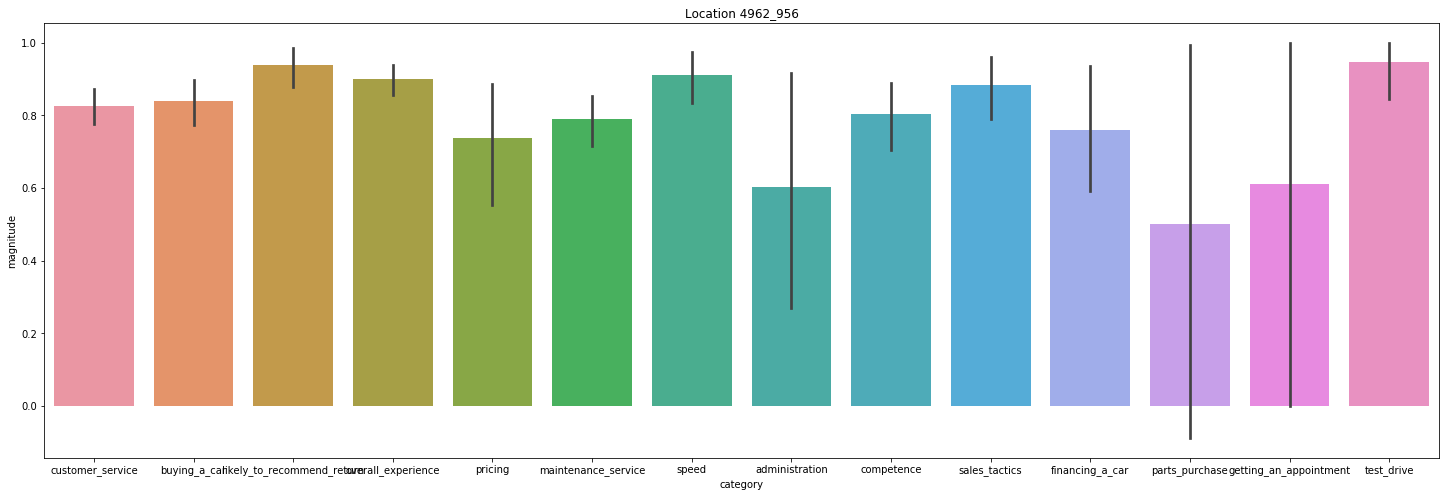

In [10]:
fig = plt.gcf()
fig.set_size_inches(25,8)
plt.title("Location 4962_956")
sns.barplot(temp['category'][temp['location_id']=='4962_956'],temp['magnitude'][temp['location_id']=='4962_956'])

##### Data For all important feature to make buying decision is present

---
#### Lets do a weigthed comparison for each features for both the locations

In [11]:
comparison=pd.DataFrame(columns=['category','4962_956','4962_248','winner'])

ncat=[]
n956=[]
n248=[]
dict_weight={'maintenance_service':15,'pricing':15,'financing_a_car':15,'buying_a_car':10,'parts_purchase':10,'overall_experience':4,'customer_service':4,'competence':4,'likely_to_recommend_return':4,'sales_tactics':4,'speed':4,'administration':4,'test_drive':4,'getting_an_appointment':3}
for cat,weight in zip(dict_weight.keys(),dict_weight.values()):
    ncat.append(cat)
    try:
        n956.append(temp['magnitude'][(temp['category']==cat) & (temp['location_id']=='4962_956')].mean()*weight)
    except:
        n956.append(0)
        
    try:
        n248.append(temp['magnitude'][(temp['category']==cat) & (temp['location_id']=='4962_248')].mean()*weight)
    except:
        n248.append(0)
comparison['category']=ncat
comparison['4962_956']=n956
comparison['4962_248']=n248
t=0
for i,j in zip(comparison['4962_956'],comparison['4962_248']):
    if i>=j:
        comparison['winner'][t]='4962_956'
    else:
        comparison['winner'][t]='4962_248'
    t+=1
comparison.head()

,category,4962_956,4962_248,winner
0,administration,2.411162,2.359263,4962_956
1,test_drive,3.786960,0.785287,4962_956
2,getting_an_appointment,1.837440,-0.083289,4962_956
3,buying_a_car,8.391894,8.777706,4962_248
4,pricing,11.066183,0.183578,4962_956


In [12]:
#if the values for imporant featues are not present then we will consider it to be 0 for example "Part_Purchase"
# This will create a major loss to location 4962_248 so in order to have more correct comparison we need this feature for this location
comparison=comparison.fillna(0)
print("Weighted category score of location 4962_956:",sum(comparison['4962_956']))
print("Weighted category score of location 4962_248:",sum(comparison['4962_248']))

('Weighted category score of location 4962_956:', 76.79518821068376)
('Weighted category score of location 4962_248:', 56.90308122970169)


##### 1.5) Conclusion
For above analysis done in 1.1,1.2,1.3,1.4 steps of notebook i found that 4962_956 is a better location & would decide to buy a car from this location.

##### WHY??
##### Overall Average Rating:
(location '4962_248 is winner in this part but with very slight margin)<br/>
'Mean Rating for Location 4962_248', 4.657534246575342<br/>
'Mean Rating for Location 4962_956', 4.619047619047619<br/>

##### Overall Average Sentiment(polartiy):
(location '4962_249 is winner in this part but with better margin)<br/>
('Mean Sentiment for Location 4962_248', 0.8392857142857143)<br/>
('Mean Sentiment for Location 4962_956', 0.9)<br/>

##### Last 3 months performance:(location '4962_248 is winner in this part but with slight margin)
(very few reviews are available for 4962_248 location but 4962_956 had many reivews)<br/>
Recent 3 months location 4962_248 :<br/>
rating       4.840000<br/>
sentiment    0.893333<br/>
Recent 3 months location 4962_956 :<br/>
rating       4.630372<br/>
sentiment    0.865330<br/>

##### Overall Sentiment Magintude:(location '4962_249 is winner in this part but with slight margin)
('Avg Magnitude of comments location 4962_248', 0.8073153195596177)<br/>
('Avg Magnitude of comments location 4962_956', 0.8395602949511987)<br/>

##### Category wise weighted score:(location '4962_249 is winner in this part but with good margin)
('Weighted category score of location 4962_956:', 76.79518821068376)<br/>
('Weighted category score of location 4962_248:', 56.90308122970169)<br/>

Apart from above reasons i also noted that location 4962_956 had much more number of reviews than other location which 
also shows the popularity of this location. with few customers, keeping performance high is easier as compare to performing well consistantly with high volumes of customers.

---

### 2) Create   a   formula   to   ranking   these   100   locations.   Explain   how   you   settled   on   this ranking/formula.   Please   also   share   the   formula   and   the   final   rankings.   (Hint:   do not   just   look   at   average   rating.)

#### Solution Steps:
#####     2.1) Identiy Feature :
##### I Selected have following 5 features-
       1) Overall Mean Rating & Sentiment Magnitude
       2) Mean Most Recent Ratings & Sentiment Magnitude(Last 3 Months)
       3) Number of Reviews Available
       4) Category wise weighted score
       
---
##### 2.2) Weightage of each feature-
       Overall Average Rating & Sentiment Magnitude- (Weightage-20)
       Most Recent Ratings & Sentiment Magnitude- (Weightage-30)
       Number of reviews- (weightage-20)
       Category wise weighted score- (weightage-30)
       
---
##### 2.3) Final Formula & Rank Determination-      

In [13]:
#Forumual= 20*OverallAvgRating&Sentiment + 30*MostRecentRatings+  20*NumberOfReviews + 30*CategoryWiseWeightedScore
Locations=data['location_id'].unique()
Rank_Var=[]

In [14]:
for loc in Locations:
    AvgRating=review['rating'][review['location_id']==loc].mean()
    AvgSentiment=data['magnitude'][data['location_id']==loc].mean()
    ORatSnt=AvgRating+AvgSentiment
    RecentRating=review['rating'][review['date']>=datetime.date(2017, 05, 01)].mean()
    RecentSnt=data['magnitude'][data['date']>=datetime.date(2017, 05, 01)].mean()
    RRatSnt=RecentRating+RecentSnt
    NOR=len(review[review['location_id']==loc])
    weighted_score=[]
    dict_weight={'maintenance_service':14,'pricing':14,'financing_a_car':14,'buying_a_car':10,'parts_purchase':10,'overall_experience':4,'customer_service':3,'competence':3,'likely_to_recommend_return':3,'sales_tactics':3,'speed':3,'administration':3,'test_drive':3,'getting_an_appointment':3,'leasing_a_car':10}
    for cat,weight in zip(dict_weight.keys(),dict_weight.values()):
        try:
            weighted_score.append(data['magnitude'][(data['category']==cat) & (data['location_id']==loc)].mean()*weight)
        except:
            weighted_score.append(0)
    weighted_score=[value for value in weighted_score if not math.isnan(value)]
    score=sum(weighted_score)
    Final_Score=20*ORatSnt + 30*RRatSnt + 20*NOR + 30*score
    Rank_Var.append(Final_Score)

In [15]:
Results=pd.DataFrame(columns=['Location','Rank_Score','Rank'])
Results['Location']=Locations
Results['Rank_Score']=Rank_Var
Results=Results.sort_values(by='Rank_Score',ascending = False).reset_index()
Results['Rank']=Results.index
del Results['index']

In [29]:
print("below are top 5 Ranked Locations:")
Results[0:5]

below are top 5 Ranked Locations:


,Location,Rank_Score,Rank
0,4962_665,15223.111979,0
1,4962_204,11882.792622,1
2,4962_854,11787.266475,2
3,4962_772,10482.032136,3
4,4962_205,10090.326969,4


### 3) Find at least one location that you think is mis-ranked by your algorithm (i.e. they should probably be higher or lower). Why are they mis-ranked? What might you do to address that issue.
#####  3.1) Look For Mis-Ranked Location<br/>
 ##### Few of the Miss Ranked Locations: 4962_237,4962_325,4962_407
 
##### 3.2) Analyze Features of Mis-Ranked Location
 

In [31]:
print("After Looking features for this location i think this location must be at higher Rank!!")
data[data['location_id']=='4962_407'].head(5)

After Looking features for this location i think this location must be at higher Rank!!


,location_id,review_id,date,rating,comment,category,sentiment,magnitude
1186,4962_407,FACEBOOK_1186,2017-04-29,5.0,I had never been to Musselman's before yesterd...,competence,1.0,0.999595
1186,4962_407,FACEBOOK_1186,2017-04-29,5.0,I had never been to Musselman's before yesterd...,likely_to_recommend_return,1.0,0.999735
1186,4962_407,FACEBOOK_1186,2017-04-29,5.0,I had never been to Musselman's before yesterd...,maintenance_service,1.0,0.999735
1186,4962_407,FACEBOOK_1186,2017-04-29,5.0,I had never been to Musselman's before yesterd...,overall_experience,1.0,0.999735
1186,4962_407,FACEBOOK_1186,2017-04-29,5.0,I had never been to Musselman's before yesterd...,speed,1.0,0.999790


#####  3.3) How to fix!!
  
##### Source of Problem:<br> Feature Last 3 months reviews is doing the damage for this locations because these locations don't have many reviews in most recent 3 months in the dataset.

##### How fix it:<br>Get More Latest review data for mis-ranked locations OR update our formula to decrease the weigth of latest reviews feature OR we can also remove this feature to see the effect on ranking but it is very import feature because it takes the latest performance of location into account!!